<a href="https://colab.research.google.com/github/chirag300/Stock-Price-Movement-Prediction-Model/blob/main/Stock_Price_Movements_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries



In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Reading Training Dataset

In [436]:
df = pd.read_csv('/content/train.csv')


In [437]:
df.head()

,exchange,RSI,RSI_signal,ATR,EMA_relative,MA_relative,SMA_relative,WMA_relative,MACD,MACD_relative,...,Bollinger_signal,ichimoku_c_conversion_line,ichimoku_c_base_line,ichimoku_c_leading_span_a,ichimoku_c_leading_span_b,ichimoku_c_signal,SAR_relative,s&p_move_15m,result,id
0,BigStock,60.176991,Hold,0.001340,0.999133,0.998415,0.158790,0.000696,0.000654,0.000990,...,Hold,-0.166616,-0.181763,-0.602090,-0.446834,Sell,-0.136418,0.252291,2.0,573919.0
1,HeroStocks,30.000000,Buy,0.009333,0.999927,0.999907,0.009270,0.000069,-0.007056,-0.000058,...,Hold,-0.012268,-0.024536,-0.292386,-0.155394,Sell,-0.006776,0.062449,2.0,292589.0
2,OkayFinance,45.454545,Hold,0.000107,0.998123,0.997812,0.219298,0.001863,-0.000028,-0.000611,...,Hold,-0.328228,-0.109409,0.109409,-0.656455,Buy,-0.143955,0.616755,1.0,80399.0
3,BubbleStocks,61.111111,Hold,0.000207,0.998539,0.998178,0.182580,0.001528,0.000053,0.000260,...,Hold,-0.231877,-0.183061,-0.170857,-0.414938,Buy,-0.192382,0.343096,1.0,109870.0
4,OkayFinance,66.666667,Hold,0.192000,0.998542,0.998191,0.181218,0.001477,0.140812,0.001585,...,Hold,-0.140734,-0.613601,-0.529160,1.339788,Sell,-0.199855,-0.352336,2.0,289641.0


In [438]:
df.shape

(170568, 40)

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170568 entries, 0 to 170567
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   exchange                    170568 non-null  object 
 1   RSI                         170568 non-null  float64
 2   RSI_signal                  170568 non-null  object 
 3   ATR                         170568 non-null  float64
 4   EMA_relative                170568 non-null  float64
 5   MA_relative                 170568 non-null  float64
 6   SMA_relative                170568 non-null  float64
 7   WMA_relative                170568 non-null  float64
 8   MACD                        170568 non-null  float64
 9   MACD_relative               170568 non-null  float64
 10  MACD_relative_signal        170568 non-null  float64
 11  MACD_relative_histogram     170568 non-null  float64
 12  ADX                         170568 non-null  float64
 13  Stoch_O_k_valu

In [440]:
df.isna().sum()

exchange                      0
RSI                           0
RSI_signal                    0
ATR                           0
EMA_relative                  0
MA_relative                   0
SMA_relative                  0
WMA_relative                  0
MACD                          0
MACD_relative                 0
MACD_relative_signal          0
MACD_relative_histogram       0
ADX                           0
Stoch_O_k_value               0
Stoch_O_k_smoothed            0
Stoch_O_d_value               0
Stoch_O_signal_value          0
Stoch_O_signal                0
pivot_point                   0
pivot_support_1               0
pivot_resistance_1            0
pivot_support_2               0
pivot_resistance_2            0
pivot_support_3               1
pivot_resistance_3            1
fibonacci_signal              1
VWAP_relative_short           1
VWAP_relative_long            1
Bollinger_upper_band          1
Bollinger_lower_band          1
Bollinger_signal              1
ichimoku

#Data Preprocessing

## Dropping null values data rows

In [441]:
nan_rows  = df.loc[df.isna().any(axis=1)]

In [442]:
nan_rows

,exchange,RSI,RSI_signal,ATR,EMA_relative,MA_relative,SMA_relative,WMA_relative,MACD,MACD_relative,...,Bollinger_signal,ichimoku_c_conversion_line,ichimoku_c_base_line,ichimoku_c_leading_span_a,ichimoku_c_leading_span_b,ichimoku_c_signal,SAR_relative,s&p_move_15m,result,id
170567,BubbleStocks,44.444444,Hold,0.001,1.000392,1.000796,-0.079573,-0.000348,-0.000289,-0.000246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [443]:
df = df.drop(df.index[170567])

In [444]:
df.isna().sum()

exchange                      0
RSI                           0
RSI_signal                    0
ATR                           0
EMA_relative                  0
MA_relative                   0
SMA_relative                  0
WMA_relative                  0
MACD                          0
MACD_relative                 0
MACD_relative_signal          0
MACD_relative_histogram       0
ADX                           0
Stoch_O_k_value               0
Stoch_O_k_smoothed            0
Stoch_O_d_value               0
Stoch_O_signal_value          0
Stoch_O_signal                0
pivot_point                   0
pivot_support_1               0
pivot_resistance_1            0
pivot_support_2               0
pivot_resistance_2            0
pivot_support_3               0
pivot_resistance_3            0
fibonacci_signal              0
VWAP_relative_short           0
VWAP_relative_long            0
Bollinger_upper_band          0
Bollinger_lower_band          0
Bollinger_signal              0
ichimoku

## Bringing dependent variable column at the end

<Axes: xlabel='result', ylabel='count'>

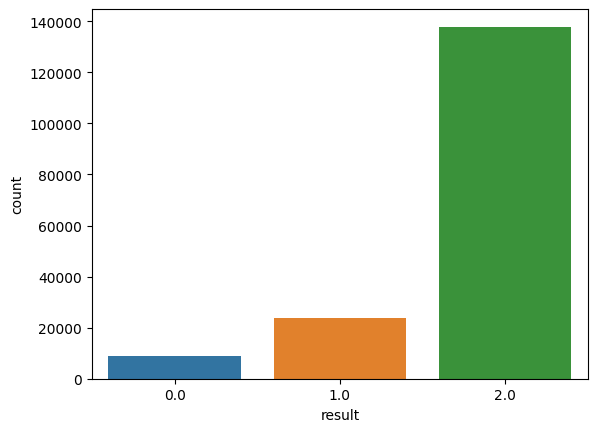

In [445]:
df['result'].value_counts()
sns.countplot( data = df, x = 'result')

<Axes: xlabel='RSI_signal', ylabel='count'>

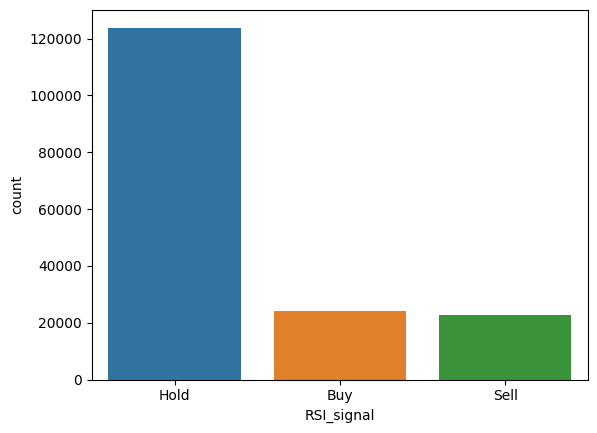

In [446]:
df['RSI_signal'].value_counts()
sns.countplot( data = df, x = 'RSI_signal')

<Axes: xlabel='Stoch_O_signal', ylabel='count'>

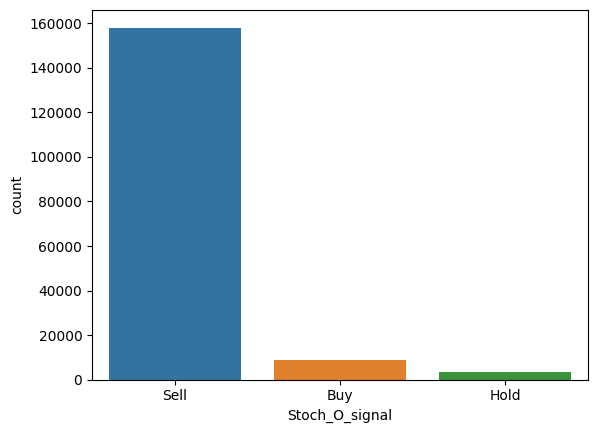

In [447]:
df['Stoch_O_signal'].value_counts()
sns.countplot( data = df, x = 'Stoch_O_signal')

<Axes: xlabel='ichimoku_c_signal', ylabel='count'>

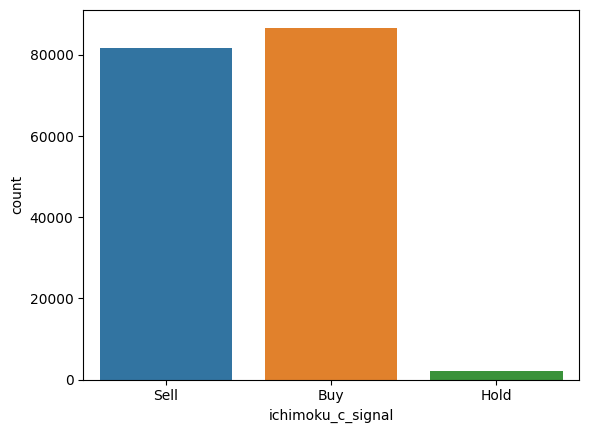

In [448]:
df['ichimoku_c_signal'].value_counts()
sns.countplot( data = df, x = 'ichimoku_c_signal')

<Axes: xlabel='fibonacci_signal', ylabel='count'>

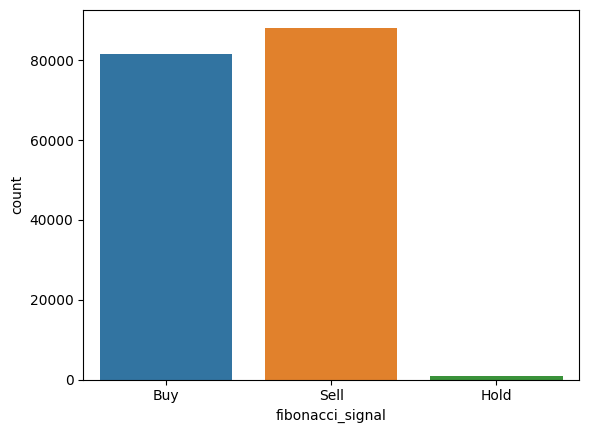

In [449]:
df['fibonacci_signal'].value_counts()
sns.countplot( data = df, x = 'fibonacci_signal')

<Axes: xlabel='Bollinger_signal', ylabel='count'>

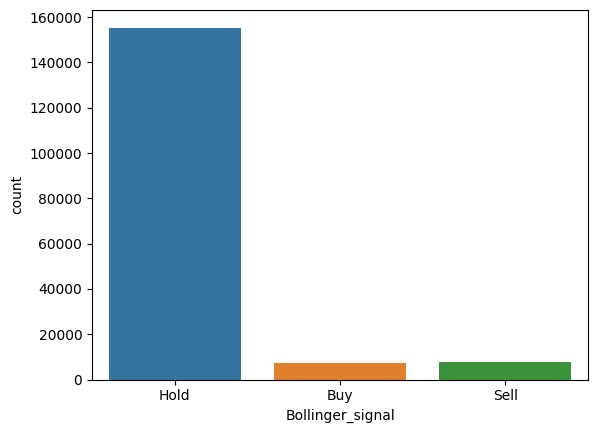

In [450]:
df['Bollinger_signal'].value_counts()
sns.countplot( data = df, x = 'Bollinger_signal')

<Axes: xlabel='exchange', ylabel='count'>

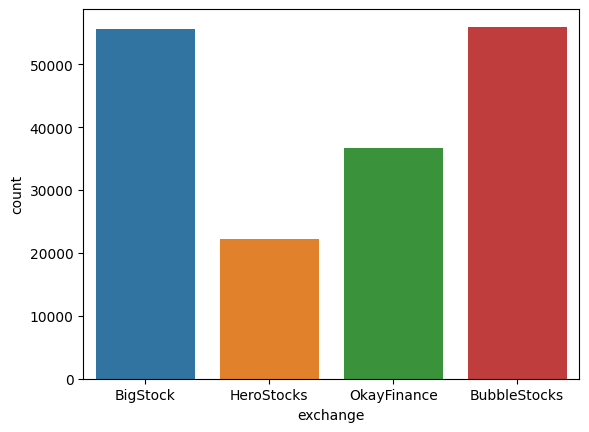

In [451]:
df['exchange'].value_counts()
sns.countplot( data = df, x = 'exchange')

In [452]:
df.head()

,exchange,RSI,RSI_signal,ATR,EMA_relative,MA_relative,SMA_relative,WMA_relative,MACD,MACD_relative,...,Bollinger_signal,ichimoku_c_conversion_line,ichimoku_c_base_line,ichimoku_c_leading_span_a,ichimoku_c_leading_span_b,ichimoku_c_signal,SAR_relative,s&p_move_15m,result,id
0,BigStock,60.176991,Hold,0.001340,0.999133,0.998415,0.158790,0.000696,0.000654,0.000990,...,Hold,-0.166616,-0.181763,-0.602090,-0.446834,Sell,-0.136418,0.252291,2.0,573919.0
1,HeroStocks,30.000000,Buy,0.009333,0.999927,0.999907,0.009270,0.000069,-0.007056,-0.000058,...,Hold,-0.012268,-0.024536,-0.292386,-0.155394,Sell,-0.006776,0.062449,2.0,292589.0
2,OkayFinance,45.454545,Hold,0.000107,0.998123,0.997812,0.219298,0.001863,-0.000028,-0.000611,...,Hold,-0.328228,-0.109409,0.109409,-0.656455,Buy,-0.143955,0.616755,1.0,80399.0
3,BubbleStocks,61.111111,Hold,0.000207,0.998539,0.998178,0.182580,0.001528,0.000053,0.000260,...,Hold,-0.231877,-0.183061,-0.170857,-0.414938,Buy,-0.192382,0.343096,1.0,109870.0
4,OkayFinance,66.666667,Hold,0.192000,0.998542,0.998191,0.181218,0.001477,0.140812,0.001585,...,Hold,-0.140734,-0.613601,-0.529160,1.339788,Sell,-0.199855,-0.352336,2.0,289641.0


## Encoding all categorical columns using Label Encoder


In [453]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['exchange'])

In [454]:
df.drop("exchange", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'Purchased'
df["exchange"] = label

In [455]:
df.head()

,RSI,RSI_signal,ATR,EMA_relative,MA_relative,SMA_relative,WMA_relative,MACD,MACD_relative,MACD_relative_signal,...,ichimoku_c_conversion_line,ichimoku_c_base_line,ichimoku_c_leading_span_a,ichimoku_c_leading_span_b,ichimoku_c_signal,SAR_relative,s&p_move_15m,result,id,exchange
0,60.176991,Hold,0.001340,0.999133,0.998415,0.158790,0.000696,0.000654,0.000990,0.999974,...,-0.166616,-0.181763,-0.602090,-0.446834,Sell,-0.136418,0.252291,2.0,573919.0,0
1,30.000000,Buy,0.009333,0.999927,0.999907,0.009270,0.000069,-0.007056,-0.000058,0.999981,...,-0.012268,-0.024536,-0.292386,-0.155394,Sell,-0.006776,0.062449,2.0,292589.0,2
2,45.454545,Hold,0.000107,0.998123,0.997812,0.219298,0.001863,-0.000028,-0.000611,0.998942,...,-0.328228,-0.109409,0.109409,-0.656455,Buy,-0.143955,0.616755,1.0,80399.0,3
3,61.111111,Hold,0.000207,0.998539,0.998178,0.182580,0.001528,0.000053,0.000260,0.998953,...,-0.231877,-0.183061,-0.170857,-0.414938,Buy,-0.192382,0.343096,1.0,109870.0,1
4,66.666667,Hold,0.192000,0.998542,0.998191,0.181218,0.001477,0.140812,0.001585,0.998712,...,-0.140734,-0.613601,-0.529160,1.339788,Sell,-0.199855,-0.352336,2.0,289641.0,3


In [456]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
label = le2.fit_transform(df['RSI_signal'])
df.drop("RSI_signal", axis=1, inplace=True)
df["RSI_signal"] = label

In [457]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
label = le2.fit_transform(df['Stoch_O_signal'])
df.drop("Stoch_O_signal", axis=1, inplace=True)
df["Stoch_O_signal"] = label

In [458]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
label = le2.fit_transform(df['ichimoku_c_signal'])
df.drop("ichimoku_c_signal", axis=1, inplace=True)
df["ichimoku_c_signal"] = label

In [459]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
label = le2.fit_transform(df['fibonacci_signal'])
df.drop("fibonacci_signal", axis=1, inplace=True)
df["fibonacci_signal"] = label

In [460]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
label = le2.fit_transform(df['Bollinger_signal'])
df.drop("Bollinger_signal", axis=1, inplace=True)
df["Bollinger_signal"] = label

In [461]:
df.head()

,RSI,ATR,EMA_relative,MA_relative,SMA_relative,WMA_relative,MACD,MACD_relative,MACD_relative_signal,MACD_relative_histogram,...,SAR_relative,s&p_move_15m,result,id,exchange,RSI_signal,Stoch_O_signal,ichimoku_c_signal,fibonacci_signal,Bollinger_signal
0,60.176991,0.001340,0.999133,0.998415,0.158790,0.000696,0.000654,0.000990,0.999974,-0.998984,...,-0.136418,0.252291,2.0,573919.0,0,1,2,2,0,1
1,30.000000,0.009333,0.999927,0.999907,0.009270,0.000069,-0.007056,-0.000058,0.999981,-1.000038,...,-0.006776,0.062449,2.0,292589.0,2,0,0,2,0,1
2,45.454545,0.000107,0.998123,0.997812,0.219298,0.001863,-0.000028,-0.000611,0.998942,-0.999553,...,-0.143955,0.616755,1.0,80399.0,3,1,2,0,0,1
3,61.111111,0.000207,0.998539,0.998178,0.182580,0.001528,0.000053,0.000260,0.998953,-0.998693,...,-0.192382,0.343096,1.0,109870.0,1,1,2,0,0,1
4,66.666667,0.192000,0.998542,0.998191,0.181218,0.001477,0.140812,0.001585,0.998712,-0.997127,...,-0.199855,-0.352336,2.0,289641.0,3,1,2,2,0,1


In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170567 entries, 0 to 170566
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RSI                         170567 non-null  float64
 1   ATR                         170567 non-null  float64
 2   EMA_relative                170567 non-null  float64
 3   MA_relative                 170567 non-null  float64
 4   SMA_relative                170567 non-null  float64
 5   WMA_relative                170567 non-null  float64
 6   MACD                        170567 non-null  float64
 7   MACD_relative               170567 non-null  float64
 8   MACD_relative_signal        170567 non-null  float64
 9   MACD_relative_histogram     170567 non-null  float64
 10  ADX                         170567 non-null  float64
 11  Stoch_O_k_value             170567 non-null  float64
 12  Stoch_O_k_smoothed          170567 non-null  float64
 13  Stoch_O_d_valu

# Splitting Data into X and y


In [463]:
y = df['result']


In [464]:
df.drop(['result'], inplace = True, axis = 1)

#Applying Feature Scaling

In [465]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_X = scaler.fit_transform(df)

#Splitting data into Test and Training set

In [466]:
from sklearn.model_selection import train_test_split


In [467]:
x_train, x_test, y_train, y_test = train_test_split(scaled_X, y , test_size = 0.1)

# Predicting the model using Logistic and Random Forest


In [468]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

In [469]:
model.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [470]:
model.score(x_test,y_test)


0.9978308026030369

In [471]:
y_pred=model.predict(x_test)

In [472]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[  880,     4,     0],
       [    3,  2402,    19],
       [    0,    11, 13738]])

In [473]:
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=11)
model_1.fit(x_train,y_train)
predictions = model_1.predict(x_test)

In [474]:
model_1.score(x_test,y_test)

1.0

#TEST DATA

In [475]:
test = pd.read_csv("/content/test.csv")
test.shape

(122662, 39)

In [476]:
test.head()

,exchange,RSI,RSI_signal,ATR,EMA_relative,MA_relative,SMA_relative,WMA_relative,MACD,MACD_relative,...,Bollinger_lower_band,Bollinger_signal,ichimoku_c_conversion_line,ichimoku_c_base_line,ichimoku_c_leading_span_a,ichimoku_c_leading_span_b,ichimoku_c_signal,SAR_relative,s&p_move_15m,id
0,BigStock,43.478261,Hold,0.000047,0.999783,1.000338,-0.033829,0.000238,-0.000053,-0.003367,...,-0.010565,Hold,-0.063452,0.571066,1.729061,1.967005,Sell,0.107612,-1.333366,4049
1,OkayFinance,60.869565,Hold,0.007800,0.994304,0.993500,0.654291,0.005838,0.001707,0.000645,...,-0.000386,Hold,-0.642479,-0.566893,-0.255102,-0.132275,Sell,-0.725446,-0.050090,292873
2,OkayFinance,89.473684,Sell,0.000023,0.999171,0.998335,0.166814,0.000700,0.000053,0.002085,...,-0.000553,Hold,-0.117096,-0.351288,-0.634270,-0.644028,Buy,-0.117630,0.182169,80893
3,OkayFinance,41.891892,Hold,0.100000,0.999145,0.999414,0.058674,0.000945,-0.035090,-0.000401,...,-0.002394,Hold,-0.165639,-0.085675,0.105666,0.428376,Sell,-0.143443,-0.001095,246380
4,HeroStocks,53.367876,Hold,0.016333,1.000864,1.000520,-0.051951,-0.001008,0.002869,0.000386,...,-0.009193,Hold,0.181476,0.094099,1.008200,1.102299,Sell,0.072801,-0.133143,145977


In [477]:
nan_rows  = test.loc[test.isna().any(axis=1)]

In [478]:
nan_rows

,exchange,RSI,RSI_signal,ATR,EMA_relative,MA_relative,SMA_relative,WMA_relative,MACD,MACD_relative,...,Bollinger_lower_band,Bollinger_signal,ichimoku_c_conversion_line,ichimoku_c_base_line,ichimoku_c_leading_span_a,ichimoku_c_leading_span_b,ichimoku_c_signal,SAR_relative,s&p_move_15m,id


# Data Preprocessing phase for Test DataSet

In [479]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
label = le2.fit_transform(test['RSI_signal'])
test.drop("RSI_signal", axis=1, inplace=True)
test["RSI_signal"] = label

from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
label = le2.fit_transform(test['exchange'])
test.drop("exchange", axis=1, inplace=True)
test["exchange"] = label

from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
label = le2.fit_transform(test['Bollinger_signal'])
test.drop("Bollinger_signal", axis=1, inplace=True)
test["Bollinger_signal"] = label

from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
label = le2.fit_transform(test['fibonacci_signal'])
test.drop("fibonacci_signal", axis=1, inplace=True)
test["fibonacci_signal"] = label

from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
label = le2.fit_transform(test['ichimoku_c_signal'])
test.drop("ichimoku_c_signal", axis=1, inplace=True)
test["ichimoku_c_signal"] = label

from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
label = le2.fit_transform(test['Stoch_O_signal'])
test.drop("Stoch_O_signal", axis=1, inplace=True)
test["Stoch_O_signal"] = label

In [480]:
test.head()

,RSI,ATR,EMA_relative,MA_relative,SMA_relative,WMA_relative,MACD,MACD_relative,MACD_relative_signal,MACD_relative_histogram,...,ichimoku_c_leading_span_b,SAR_relative,s&p_move_15m,id,RSI_signal,exchange,Bollinger_signal,fibonacci_signal,ichimoku_c_signal,Stoch_O_signal
0,43.478261,0.000047,0.999783,1.000338,-0.033829,0.000238,-0.000053,-0.003367,0.999491,-1.002858,...,1.967005,0.107612,-1.333366,4049,1,0,1,2,2,2
1,60.869565,0.007800,0.994304,0.993500,0.654291,0.005838,0.001707,0.000645,0.995306,-0.994661,...,-0.132275,-0.725446,-0.050090,292873,1,3,1,0,2,2
2,89.473684,0.000023,0.999171,0.998335,0.166814,0.000700,0.000053,0.002085,0.999947,-0.997862,...,-0.644028,-0.117630,0.182169,80893,2,3,1,0,0,0
3,41.891892,0.100000,0.999145,0.999414,0.058674,0.000945,-0.035090,-0.000401,0.998933,-0.999334,...,0.428376,-0.143443,-0.001095,246380,1,3,1,0,2,2
4,53.367876,0.016333,1.000864,1.000520,-0.051951,-0.001008,0.002869,0.000386,1.000989,-1.000603,...,1.102299,0.072801,-0.133143,145977,1,2,1,2,2,2


In [481]:
X_2 = test.iloc[:, 0:].values
from sklearn.preprocessing import StandardScaler
sc_test = StandardScaler()
X_2 = sc_test.fit_transform(X_2)
X_2

array([[-0.32894155, -0.08041916, -0.05790148, ...,  0.96690851,
         1.04156399,  0.27292995],
       [ 0.62959571, -0.07763795, -1.69275681, ..., -1.03946795,
         1.04156399,  0.27292995],
       [ 2.20613725, -0.08042777, -0.24048822, ..., -1.03946795,
        -0.97264584, -4.02244261],
       ...,
       [-0.01393838, -0.07977605, -0.29206628, ..., -1.03946795,
        -0.97264584,  0.27292995],
       [-0.88808828, -0.08040983,  0.49939366, ...,  0.96690851,
        -0.97264584,  0.27292995],
       [ 1.34279307, -0.08041485, -0.3572902 , ..., -1.03946795,
        -0.97264584,  0.27292995]])

# Predicting the test set results using above random forest classifier


In [496]:
y1 = model_1.predict(X_2)
to_append = pd.DataFrame(y1, columns = ['result'])

In [486]:
yo = test['id']
yo

0           4049
1         292873
2          80893
3         246380
4         145977
           ...  
122657     97614
122658    189089
122659     59169
122660    287199
122661    223041
Name: id, Length: 122662, dtype: int64

In [499]:
to_append = to_append.astype(int)

answer5 = pd.concat([yo,to_append] ,axis= 1)
answer5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122662 entries, 0 to 122661
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      122662 non-null  int64
 1   result  122662 non-null  int64
dtypes: int64(2)
memory usage: 1.9 MB


##Exporting In CSV

In [500]:
answer5.to_csv("submission.csv", index = False)